In [29]:
import numpy as np
import matplotlib.pyplot as plt
import glob, re

from astropy.table import Table, join, Column

from thejoker.data import RVData
from thejoker.sampler import JokerParams, TheJoker
from thejoker.plot import plot_rv_curves

import astropy.units as u
import corner

% matplotlib inline

import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

mpl.rcParams['figure.figsize']=(12.0,9.0)    #(6.0,4.0)
mpl.rcParams['font.size']=20               #10 
mpl.rcParams['savefig.dpi']= 200             #72 
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
from matplotlib import rc

colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


In [3]:
ls ../results/

results_rvs.png     results_video.hdf5


In [18]:
fname = '../rvs.csv'
data = Table.read(fname)

In [21]:
t = data['JD']
rv = data['RV_wobble'] * u.m/u.s
err =  data['RV_err_wobble'] * u.m/u.s
data = RVData(t=t, rv=rv, stddev=err)


Text(0, 0.5, 'RV [km/s]')

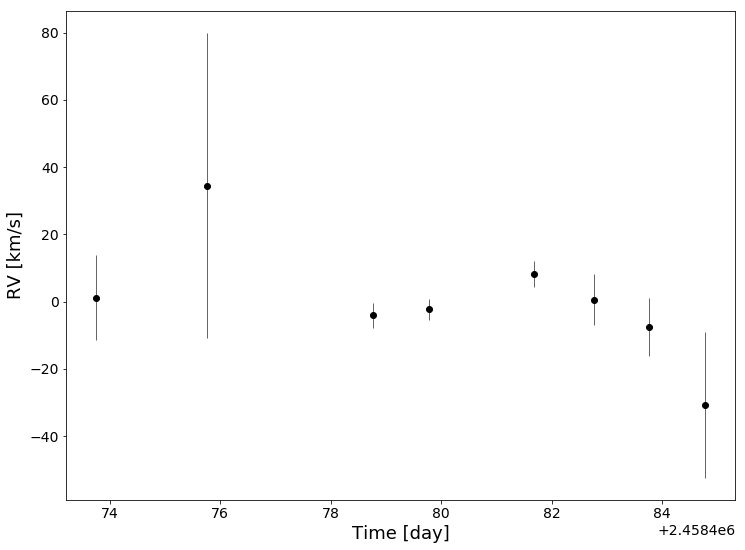

In [23]:
ax = data.plot() # doctest: +SKIP
ax.set_xlabel("Time [day]") # doctest: +SKIP
ax.set_ylabel("RV [km/s]") # doctest: +SKIP


In [25]:
params = JokerParams(P_min=1*u.day, P_max=20*u.day)

In [26]:
joker = TheJoker(params)

In [27]:
%time
samples = joker.rejection_sample(data, n_prior_samples=65536)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs
INFO: 6512 good samples after rejection sampling [thejoker.sampler.sampler]


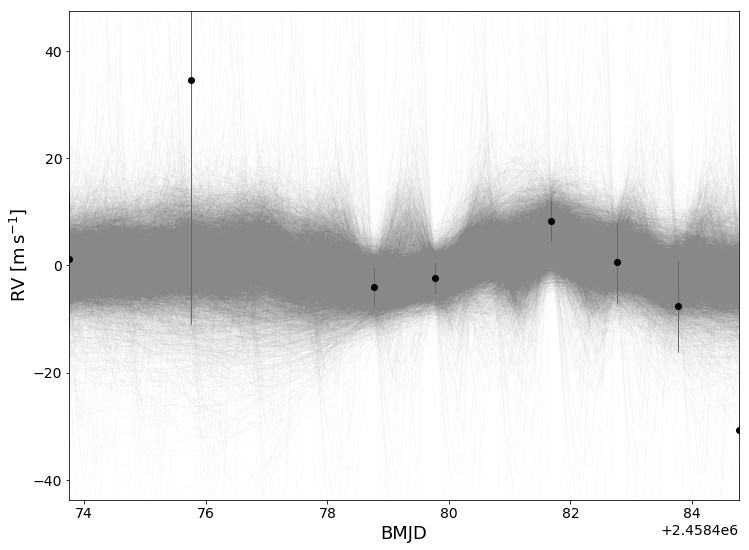

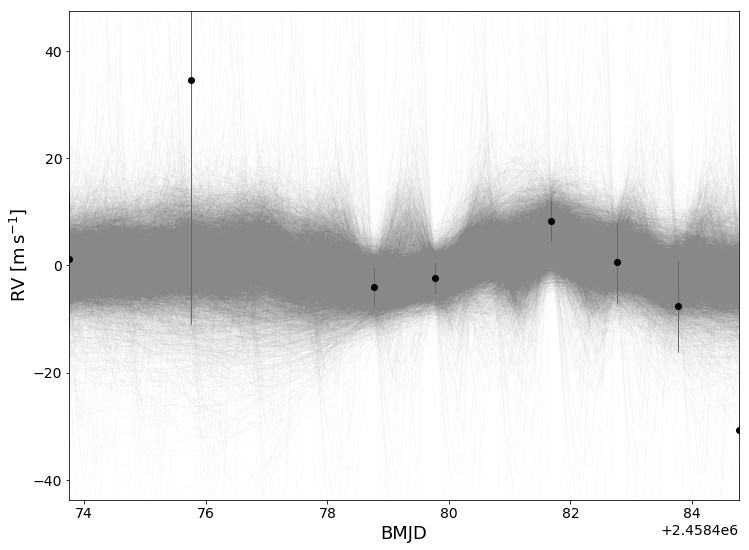

In [32]:
t_grid = np.linspace(t.min(), t.max(), 1024)

ax = data.plot() # doctest: +SKIP
ax.set_xlabel("Time [day]") # doctest: +SKIP
ax.set_ylabel("RV [km/s]") # doctest: +SKIP

plot_rv_curves(samples, t_grid, rv_unit=u.m/u.s, data=data, ax=ax,
               plot_kwargs=dict(color='#888888'))


In [83]:
test.mean()

JokerSamples([('P', <Quantity 5.60519405 d>),
              ('M0', <Quantity 3.13932534 rad>),
              ('e', <Quantity 0.20563872>),
              ('omega', <Quantity 3.1474374 rad>),
              ('K', <Quantity 6.60888349 m / s>),
              ('v0', <Quantity -0.13145615 m / s>)])

In [84]:
test.std()

JokerSamples([('P', <Quantity 3.45424761 d>),
              ('M0', <Quantity 1.81358981 rad>),
              ('e', <Quantity 0.17484781>),
              ('omega', <Quantity 1.93749568 rad>),
              ('K', <Quantity 4.38728916 m / s>),
              ('v0', <Quantity 3.16969349 m / s>)])

In [79]:
test.move_to_end('jitter')
test.popitem()

('jitter', <Quantity [0., 0., 0., ..., 0., 0., 0.] m / s>)

In [82]:
test

JokerSamples([('P',
               <Quantity [ 1.20249492,  8.4666196 , 16.89337675, ...,  1.25691448,
                           5.60195122,  8.74599773] d>),
              ('M0',
               <Quantity [4.77308452, 1.58637796, 1.02417177, ..., 1.35249338, 0.58528994,
                          1.91151153] rad>),
              ('e',
               <Quantity [0.50268118, 0.18762788, 0.0203517 , ..., 0.28127989, 0.64466982,
                          0.06700114]>),
              ('omega',
               <Quantity [1.68727605, 2.23943605, 2.5698729 , ..., 5.7114908 , 2.66641721,
                          3.52402472] rad>),
              ('K',
               <Quantity [12.09512764, 19.68077515,  4.61919523, ...,  4.57426308,
                           4.69865428,  1.40731447] m / s>),
              ('v0',
               <Quantity [-0.97350344, -7.52417508, -0.86033901, ..., -2.95857903,
                           0.93864242, -2.47190647] m / s>)])